# Data from Credit - Bureau

This notebook will do some EDA on the Credit_bureau dataset and select a few columns to merge with the main dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
bbalance_df = pd.read_csv("data/bureau_balance.csv")
b_df = pd.read_csv("data/bureau.csv")

In [3]:
# both datasets include together around 2.5 Million rows
bbalance_df.sample(3)
len(bbalance_df.SK_ID_BUREAU.unique()), len(b_df.SK_ID_BUREAU.unique())

(817395, 1716428)

In [4]:
# example of the status of a client changing over the time
bbalance_df[bbalance_df["SK_ID_BUREAU"] == 5715449]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
27,5715449,0,C
28,5715449,-1,C
29,5715449,-2,C
30,5715449,-3,C
31,5715449,-4,C
32,5715449,-5,C
33,5715449,-6,0
34,5715449,-7,0
35,5715449,-8,0
36,5715449,-9,0


In [5]:
status = bbalance_df.STATUS.unique().tolist()


In [6]:
dummies = pd.get_dummies(bbalance_df)

In [7]:
status_df = dummies.drop("MONTHS_BALANCE",axis=1).groupby("SK_ID_BUREAU", as_index=False).sum()

In [8]:
df = pd.merge(status_df, b_df[["SK_ID_BUREAU", "SK_ID_CURR"]], how="left", on="SK_ID_BUREAU")

In [9]:
#df.sort_values("SK_ID_BUREAU")


In [10]:
df.drop("SK_ID_BUREAU", axis=1, inplace=True)
df.dropna(inplace=True)

In [11]:
df = df.groupby("SK_ID_CURR", as_index=False).sum()

In [12]:
df.head(5)

,SK_ID_CURR,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,100001.0,31.0,1.0,0.0,0.0,0.0,0.0,110.0,30.0
1,100002.0,45.0,27.0,0.0,0.0,0.0,0.0,23.0,15.0
2,100005.0,14.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
3,100010.0,20.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0
4,100013.0,79.0,7.0,0.0,0.0,0.0,0.0,103.0,41.0


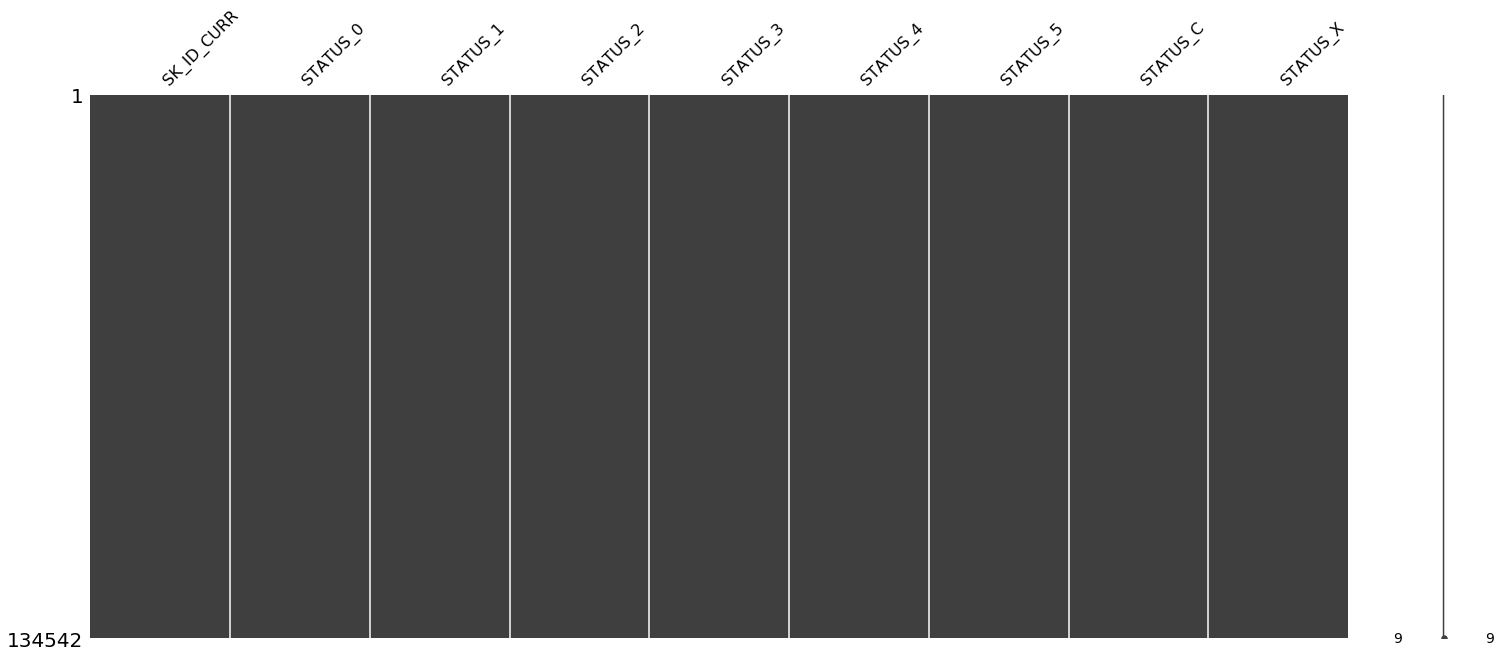

In [13]:
import missingno as msno
msno.matrix(df)

In [14]:
df_credit_bureau = df
%store df_credit_bureau

Stored 'df_credit_bureau' (DataFrame)
